### CreditScore Data Set 

###### Models will be fitted
1. Logistic Regression
2. SVM
3. Random Forest
4. ElasticNet
5. Ensumble These 4 Models

In [1]:
#Import Libraries
import csv
import numpy as np
import pandas as pd

### Import Descision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA


from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Perform the necessary imports
import matplotlib.pyplot as plt
## for pearsonr correlation just feed x and y to this
from scipy.stats import pearsonr
pd.options.display.max_columns=60
#Change the Number Fromat of DATA frame
pd.options.display.float_format = '{:,.4f}'.format

In [2]:
### Load the Data
seed=42
path="C:\\Users\\fbaharkoush\\IE 598 Machine Learning\\Homework\\Group Project\\"
df_credit=pd.read_csv(path+"MLF_GP1_CreditScore.csv")
if df_credit.isnull().sum().sum()==0:
    print("No Missing Values in the dataset")

No Missing Values in the dataset


In [3]:
### Get the dummy variables of Rating and merge it with the dataset
df_credit_dummies=pd.merge(df_credit.reset_index(),
         pd.get_dummies(df_credit["Rating"]).reset_index(),
        left_on="index",right_on="index",how="left").drop("index",axis=1)

In [4]:
df_credit_dummies.head(2)

,Sales/Revenues,Gross Margin,EBITDA,EBITDA Margin,Net Income Before Extras,Total Debt,Net Debt,LT Debt,ST Debt,Cash,Free Cash Flow,Total Debt/EBITDA,Net Debt/EBITDA,Total MV,Total Debt/MV,Net Debt/MV,CFO/Debt,CFO,Interest Coverage,Total Liquidity,Current Liquidity,Current Liabilities,EPS Before Extras,PE,ROA,ROE,InvGrd,Rating,A1,A2,A3,Aa2,Aa3,Aaa,B1,B2,B3,Ba1,Ba2,Ba3,Baa1,Baa2,Baa3,Caa1
0,-0.0055,0.0308,0.0189,0.0245,0.1468,-0.0297,-0.0193,-0.0426,0.0499,-0.1337,0.3530,-0.0477,-0.0375,0.2636,-0.2321,-0.2239,0.1012,0.0685,0.1367,0.3921,-0.1849,0.0628,0.1483,0.1004,0.1633,0.1025,1,A1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,-0.0055,0.0308,0.0887,0.0947,0.1468,-0.0297,-0.0193,-0.0426,0.0499,-0.1337,0.3530,-0.1088,-0.0992,0.0454,-0.0719,-0.0619,0.1012,0.0685,0.2147,0.3921,-0.1849,0.0628,0.1483,-0.0896,0.1633,0.1025,1,A1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
### X and y
X=scale(df_credit_dummies.drop(['InvGrd', 'Rating'],axis=1).values)
y=df_credit_dummies["InvGrd"].values
### Train and Test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=seed)

###  PCA with Dummy Variables

In [6]:
# Create PCA instance: model
pca_model = PCA()
### Fit the Features value to PCA
pca_model.fit_transform(X)

array([[-1.15248335e-01,  3.04056439e-02, -5.73625149e-02, ...,
        -1.98683295e-03,  1.21401142e-03, -2.07682906e-15],
       [-1.06970414e-01,  4.46568712e-02, -1.00024599e-02, ...,
        -2.10264952e-03,  4.68145873e-05, -1.09291666e-15],
       [-1.00726759e-01,  4.49912941e-02,  2.03696419e-02, ...,
        -7.42464244e-04,  4.08196549e-04,  4.80258635e-15],
       ...,
       [-1.64284497e-01, -6.88637238e-01, -5.71696306e-01, ...,
        -1.00729677e-03,  1.42029979e-03,  1.05203267e-15],
       [-1.02581361e-01, -7.12270022e-01, -6.22364252e-01, ...,
         7.70699272e-04, -1.54993582e-03,  4.80073863e-16],
       [-2.14992750e-01, -6.88032028e-01, -6.28300064e-01, ...,
         2.69455000e-03, -8.46058966e-04,  9.73895010e-17]])

In [7]:
X_features=list(df_credit_dummies.drop(['InvGrd', 'Rating'],axis=1).columns)

In [8]:
df_pca_exp_var=pd.DataFrame({"Features":X_features,
              "PCA_Exp_Var":pca_model.explained_variance_ratio_}).sort_values("PCA_Exp_Var",ascending=False)
df_pca_exp_var["Cummulative Exp Var"]=df_pca_exp_var["PCA_Exp_Var"].cumsum()

##### PCA Report With Dummy Variables

In [9]:
df_pca_exp_var

,Features,PCA_Exp_Var,Cummulative Exp Var
0,Sales/Revenues,0.0936,0.0936
1,Gross Margin,0.0737,0.1673
2,EBITDA,0.0707,0.2381
3,EBITDA Margin,0.0517,0.2897
4,Net Income Before Extras,0.0495,0.3392
5,Total Debt,0.0481,0.3873
6,Net Debt,0.0372,0.4245
7,LT Debt,0.0298,0.4543
8,ST Debt,0.0288,0.4831
9,Cash,0.0282,0.5113


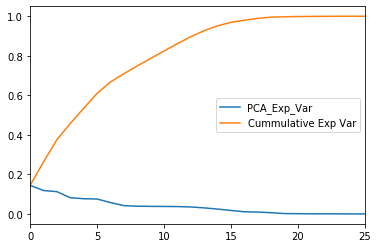

In [26]:
df_pca_exp_var.plot()

###  Logistic Regression
1. InvGrd with Duummy Variables

In [10]:
## Fit the Model
logReg_model=LogisticRegression(solver='lbfgs')
logReg_model.fit(X_train,y_train)
### Predict
y_pred_train=logReg_model.predict(X_train)
y_pred_test=logReg_model.predict(X_test)

In [11]:
print("Accuracy Score of Logistic Regression Model with dummy variables on Train Set",logReg_model.score(X_train,y_train))
print("Accuracy Score of Logistic Regression Model with dummy variables on Test Set",logReg_model.score(X_test,y_test))
print("ROC_AUC of Logistic Regression Model with dummy variables on Train Set",roc_auc_score(y_train,y_pred_train))
print("ROC_AUC  of Logistic Regression Model with dummy variables on Test Set",roc_auc_score(y_test,y_pred_test))

Accuracy Score of Logistic Regression Model with dummy variables on Train Set 1.0
Accuracy Score of Logistic Regression Model with dummy variables on Test Set 1.0
ROC_AUC of Logistic Regression Model with dummy variables on Train Set 1.0
ROC_AUC  of Logistic Regression Model with dummy variables on Test Set 1.0


As we noticed creating the dummy variables is boosting the model accuracy. In the following code we are going to remove "Rating" dummy variables and run the logistic regression model again and see what happens to the result.

In [12]:
list_to_drop=['InvGrd', 'Rating', 'A1', 'A2', 'A3', 'Aa2', 'Aa3', 'Aaa',
       'B1', 'B2', 'B3', 'Ba1', 'Ba2', 'Ba3', 'Baa1', 'Baa2', 'Baa3', 'Caa1']

In [13]:
X=scale(df_credit_dummies.drop(list_to_drop,axis=1).values)
y=df_credit_dummies["InvGrd"].values
### Train and Test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=seed)

### PCA without Dummy Variables

In [14]:
# Create PCA instance: model
pca_model = PCA()
### Fit the Features value to PCA
pca_model.fit_transform(X)

array([[-0.15189997,  0.0235405 , -0.06845795, ..., -0.00784368,
        -0.00442878, -0.00160618],
       [-0.14272847,  0.03249937, -0.01855342, ..., -0.00370066,
        -0.00426299, -0.00279038],
       [-0.13566313,  0.02783463,  0.00923416, ..., -0.00908331,
        -0.00279016, -0.00242822],
       ...,
       [-0.13568104, -0.43058978, -0.44130577, ...,  0.02968121,
        -0.00582438,  0.00059085],
       [-0.0733207 , -0.4424719 , -0.4753796 , ..., -0.00732613,
        -0.00338393, -0.00238864],
       [-0.18756961, -0.4270099 , -0.50309818, ..., -0.0221842 ,
        -0.00134203, -0.00167871]])

In [15]:
X_features=list(df_credit_dummies.drop(list_to_drop,axis=1).columns)

In [16]:
df_pca_exp_var=pd.DataFrame({"Features":X_features,
              "PCA_Exp_Var":pca_model.explained_variance_ratio_}).sort_values("PCA_Exp_Var",ascending=False)
df_pca_exp_var["Cummulative Exp Var"]=df_pca_exp_var["PCA_Exp_Var"].cumsum()

##### PCA Report Without Dummy Variables

In [17]:
df_pca_exp_var

,Features,PCA_Exp_Var,Cummulative Exp Var
0,Sales/Revenues,0.1443,0.1443
1,Gross Margin,0.1185,0.2628
2,EBITDA,0.1126,0.3754
3,EBITDA Margin,0.0819,0.4573
4,Net Income Before Extras,0.0769,0.5342
5,Total Debt,0.0755,0.6097
6,Net Debt,0.0575,0.6672
7,LT Debt,0.0420,0.7092
8,ST Debt,0.0390,0.7482
9,Cash,0.0382,0.7864


### Logistic Regression without Dummy Variables

In [18]:
## Fit the Model
logReg_model=LogisticRegression(solver='lbfgs')
logReg_model.fit(X_train,y_train)
### Predict
y_pred_train=logReg_model.predict(X_train)
y_pred_test=logReg_model.predict(X_test)

In [19]:
print("Accuracy Score of Logistic Regression Model WITHOUT dummy variables on Train Set",logReg_model.score(X_train,y_train))
print("Accuracy Score of Logistic Regression Model WITHOUT dummy variables on Test Set",logReg_model.score(X_test,y_test))
print("ROC_AUC of Logistic Regression Model WITHOUT dummy variables on Train Set",roc_auc_score(y_train,y_pred_train))
print("ROC_AUC  of Logistic Regression Model WITHOUT dummy variables on Test Set",roc_auc_score(y_test,y_pred_test))

Accuracy Score of Logistic Regression Model WITHOUT dummy variables on Train Set 0.7717647058823529
Accuracy Score of Logistic Regression Model WITHOUT dummy variables on Test Set 0.7529411764705882
ROC_AUC of Logistic Regression Model WITHOUT dummy variables on Train Set 0.5353135034645935
ROC_AUC  of Logistic Regression Model WITHOUT dummy variables on Test Set 0.5291506017058067


### Classification Report on Test Set 

In [20]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.62      0.07      0.13       108
           1       0.76      0.98      0.86       317

    accuracy                           0.75       425
   macro avg       0.69      0.53      0.49       425
weighted avg       0.72      0.75      0.67       425



In [21]:
import pandas as pd
y_actu = pd.Series(y_test, name='Actual')
y_pred = pd.Series(y_pred_test, name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred)

In [22]:
df_confusion

Predicted,0,1
Actual,,
0,8,100
1,5,312


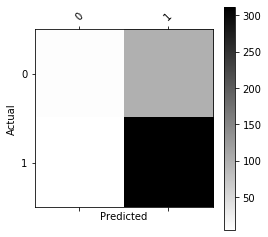

In [23]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(df_confusion, title='Confusion matrix', cmap=plt.cm.gray_r):
    plt.matshow(df_confusion, cmap=cmap) # imshow
    #plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(df_confusion.columns))
    plt.xticks(tick_marks, df_confusion.columns, rotation=45)
    plt.yticks(tick_marks, df_confusion.index)
    #plt.tight_layout()
    plt.ylabel(df_confusion.index.name)
    plt.xlabel(df_confusion.columns.name)

plot_confusion_matrix(df_confusion)

###  Random Forest with Cross Validation